# Simple Regression - iid measurements and Scaler Variables

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

#### Data Generating - Data loading 

In [29]:
np.random.seed(2)
N = 1000
X = np.random.randn(N, 1)
y = 1 + 2*X + 0.5*np.random.randn(N, 1)

#### Plot the Data

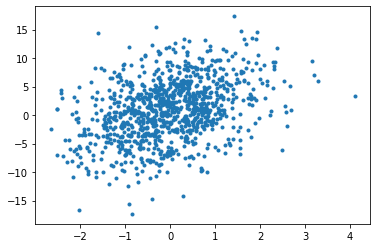

In [24]:
plt.plot(X, y, '.')
plt.show()

#### Data Preparing 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
one_train = np.ones((len(X_train), 1))
X_train = np.hstack((one_train, X_train))
print(X_train.shape)

(800, 2)


#### Parameters Estimation using LS method 

In [31]:
den = 0
num = np.zeros((1, 2))
# for i in range(len(X_train)):
for ind, dp in enumerate(X_train):
    num += dp * y_train[ind]
    den += dp ** 2
W = num/den
W

array([[0.91533743, 1.95391987]])

#### Evaluate the Model 

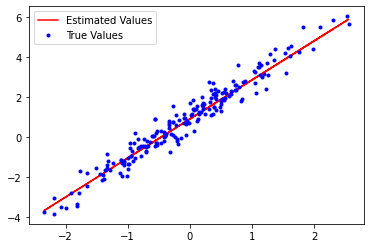

In [32]:
y_pre = W[0][0] + W[0][1]*X_test

plt.plot(X_test, y_pre, 'r')
plt.plot(X_test, y_test, 'b.')
plt.legend(['Estimated Values', 'True Values'])
plt.show()

#### Evaluation of Error

-0.09014250641622018
0.4409211722122768


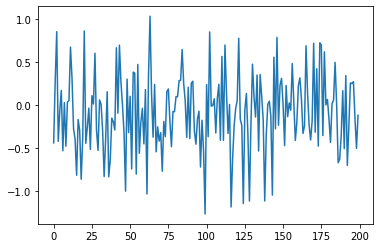

In [33]:
error = y_pre - y_test
print(np.mean(error))
print(np.std(error))
plt.plot(error)
plt.show()

# Simple Regression with iid Measurements - Multivariate Case

#### Data Generating 

In [45]:
np.random.seed(2)
N = 1000
X1 = np.random.randn(N, 1)
X2 = 2 + np.random.randn(N, 1)
X3 = 2*np.random.randn(N, 1)
X4 = 2 + 2*np.random.randn(N, 1)
y = 0.5 - 3*X1 + 4*X2 + 3*X3 - 0.05*X4 + 5*np.random.randn(N, 1)

#### Plot the Data 

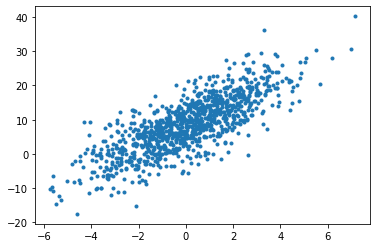

In [37]:
plt.plot(X3, y, '.')
plt.show()

#### Data Preparing 

In [46]:
one = np.ones((N, 1))
X = np.hstack((one, X1, X2, X3, X4))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape)

(1000, 5)


In [47]:
X_T_X_train = np.matmul(X_train.T, X_train)
X_T_Y_train = np.matmul(X_train.T, y_train)
W = np.matmul(np.linalg.inv(X_T_X_train), X_T_Y_train)
W

array([[ 0.31950655],
       [-3.26371873],
       [ 4.09455808],
       [ 3.07124004],
       [-0.1334039 ]])

#### Evaluate the Model  

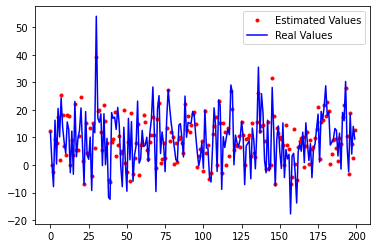

In [48]:
y_pre = np.matmul(X_test, W)
plt.plot(y_pre, 'r.')
plt.plot(y_test, 'b-')
plt.legend(['Estimated Values', 'Real Values'])
plt.show()

#### Evaluation of the Error 

0.06471620642390427
5.357363813785374


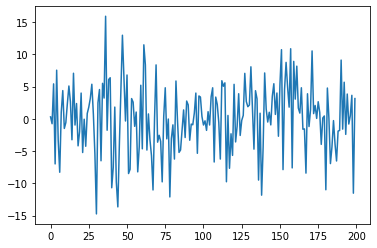

In [49]:
Error = y_pre - y_test
print(np.mean(Error))
print(np.std(Error))
plt.plot(Error)
plt.show()

# Simple Regression with non - iid Measurements 

#### Data Generating 

In [15]:
np.random.seed(2)
N = 1000
X1 = np.random.randn(N, 1)
X2 = 2 + np.random.randn(N, 1)
X3 = 2*np.random.randn(N, 1)
X4 = 2 + 2*np.random.randn(N, 1)
y = np.empty((N, 1))
for k in range(N):
    sigma = np.random.randint(4)
    if sigma == 0:
        sigma = 1
    y[k] = 0.5 - 3*X1[k] + 4*X2[k] + 3*X3[k] - 0.05*X4[k] + sigma*np.random.randn(1, 1)

#### Plot the Data 

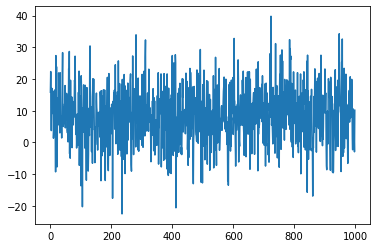

In [4]:
plt.plot(y)
plt.show()

#### Data Preparing

In [16]:
one = np.ones((N, 1))
X = np.hstack((one, X1, X2, X3, X4))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape)

(1000, 5)


#### How to Weight the Measurements?
1 - Consider the convariance matrix of noide as the weight matrix, if available!

2 - Do some LS estimation and consider the variance of noise as the weight matrix

3 - Calculate the distance between data points and the mean of data 

In [17]:
distance = np.exp(np.abs((X_train - np.mean(X_train))))
mean = np.mean(distance, axis=1).reshape(-1, 1)
# mean = np.mean(distance, axis=1)
# print(mean.shape)
weights = np.diagflat(np.matrix(mean))
X_T_Q_train = np.matmul(X_train.T, np.linalg.inv(weights))
# X_T_Q_train.shape
X_T_Q_X_train = np.matmul(X_T_Q_train, X_train)
X_T_Q_Y_train = np.matmul(X_T_Q_train, y_train)
W = np.matmul(np.linalg.inv(X_T_Q_X_train), X_T_Q_Y_train)
W

matrix([[ 0.68226776],
        [-3.01997318],
        [ 3.9544395 ],
        [ 2.99343514],
        [-0.11750729]])

#### Evaluation the Model 

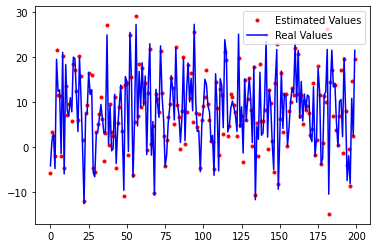

In [18]:
y_pre = np.matmul(X_test, W)
plt.plot(y_pre, 'r.')
plt.plot(y_test, 'b-')
plt.legend(['Estimated Values', 'Real Values'])
plt.show()

#### Error Evaluation 

-0.03420012322019783
1.9990272327308927


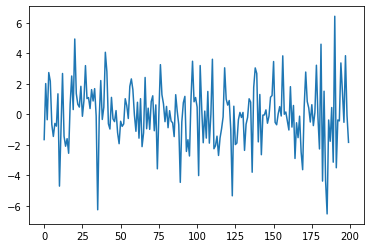

In [19]:
Error = y_pre - y_test
print(np.mean(Error))
print(np.std(Error))
plt.plot(Error)
plt.show()

In [22]:
# inheritance
# polymorphism
# encapsulation
# abstraction
# aggregation
# composition
# delegation
# duck typing
# dynamic dispatch
# overloading / overriding
